In [ ]:
#Census Income
This data was extracted from the 1994 Census bureau database by Ronny Kohavi & Barry Becker (Data Mining and Visualization, Silicon Graphics). 
A set of reasonably clean records was extracted using the following conditions:((AAGE>16)&(AGI>100)&(AFNLWGT>1)&(HRSWK>0)). 
The prediction task is to determine whether a person makes over $50K a year.

In [50]:
# Libraries import and Loading the file
import numpy as np
import pandas as pd
df = pd.read_csv(r'C:\Users\Admin\Downloads\census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [49]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [47]:
# removal of duplicated rows
df.duplicated().sum()

24

In [30]:
df = df.drop_duplicates()
df.shape

(32536, 15)

In [31]:
#Distinction between numerical vs. text values
cat_feat = df.select_dtypes(include=['object']).columns
cat_feat

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

In [32]:
num_feat = df.select_dtypes(include=['int64']).columns
num_feat

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

In [33]:
# statistical measures of numerical values
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [114]:
#pairwise relationships in a dataset.
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [85]:
# Taking a look at the target (income) without distinction of sex
print(f"Ratio above 50k : {(df['Income'] == ' >50K').astype('int').sum() / df.shape[0] * 100 :.2f}%")

Ratio above 50k : 24.08%


<Figure size 1600x1000 with 0 Axes>

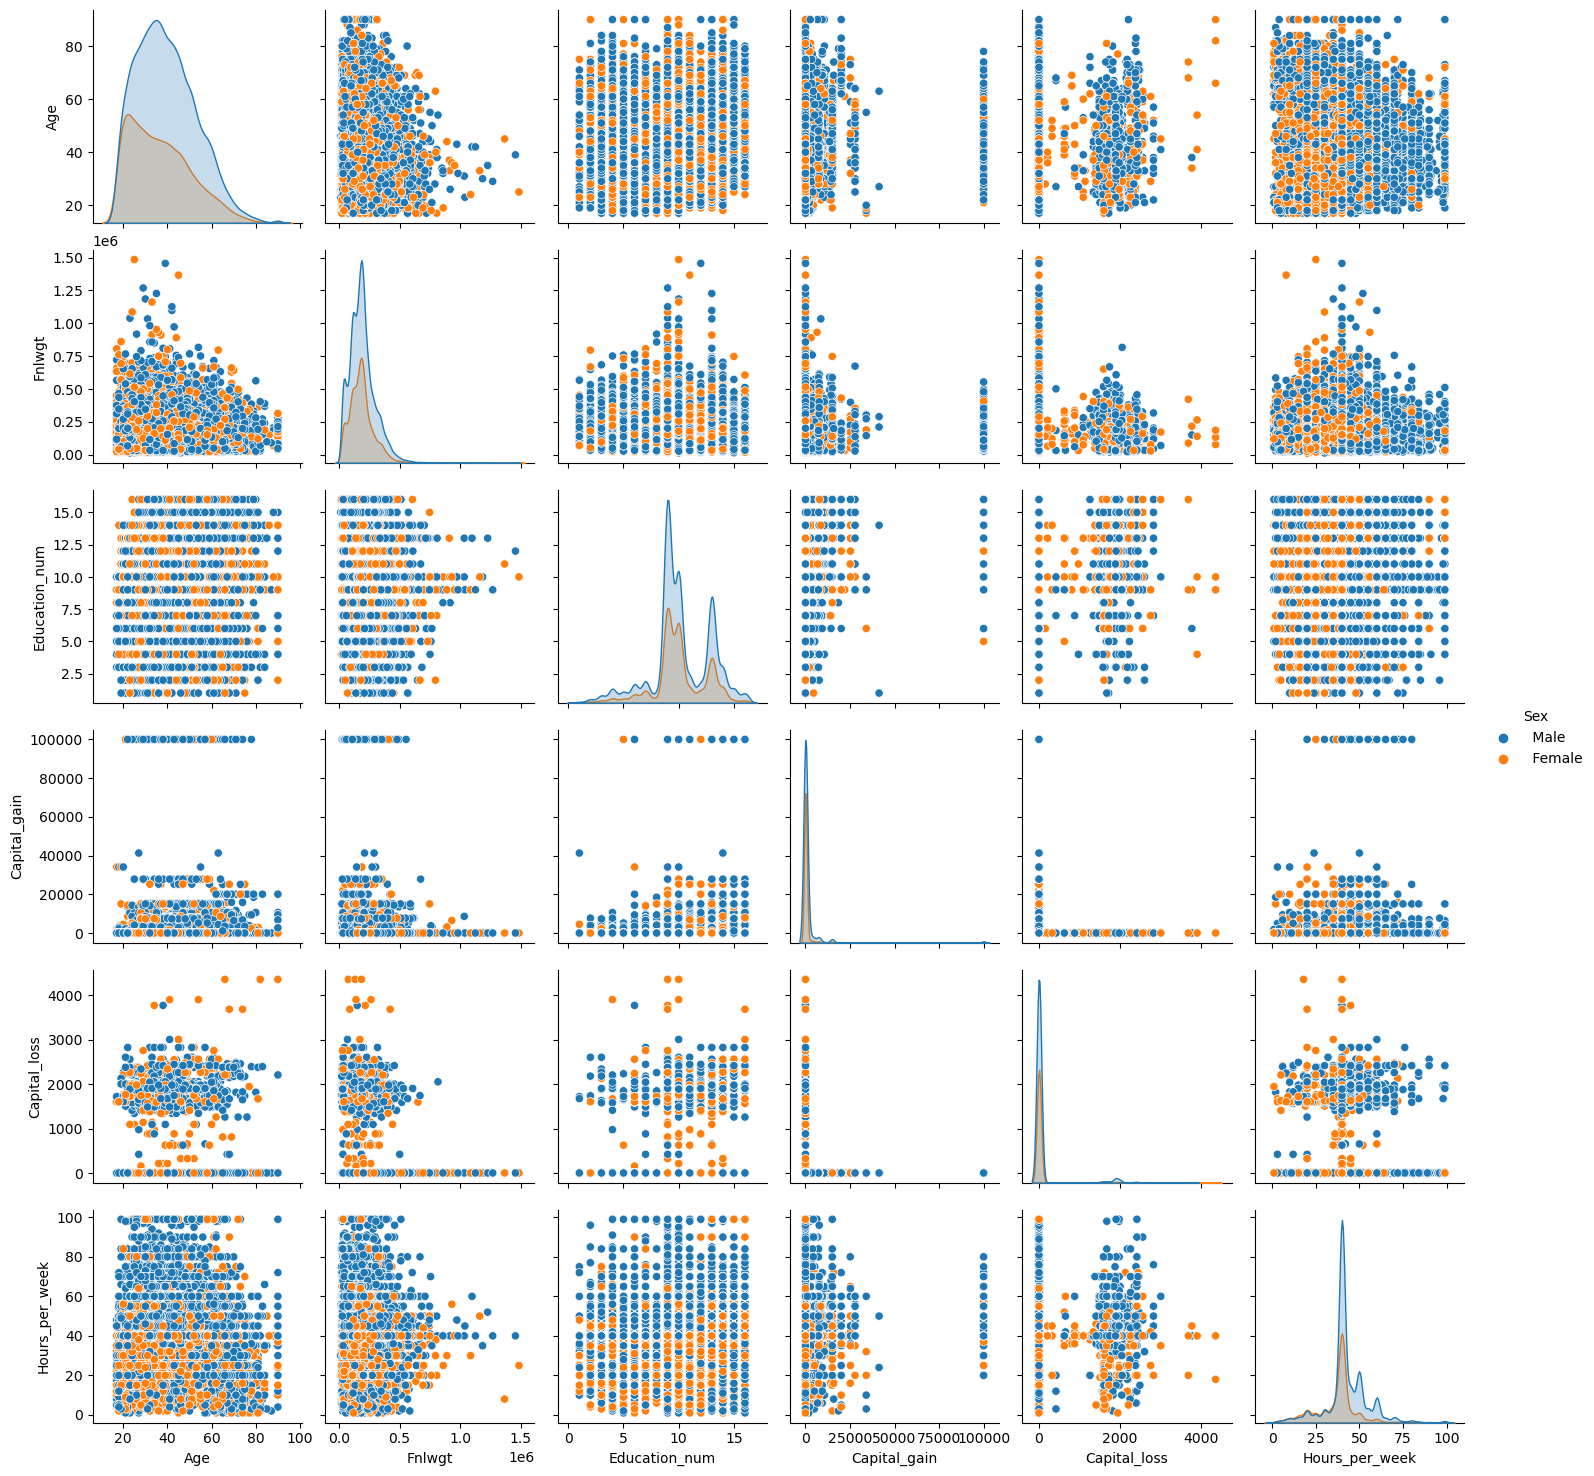

In [96]:
plt.figure(2, figsize=(16,10))
sns.pairplot(data=df, hue='Sex')
plt.show()

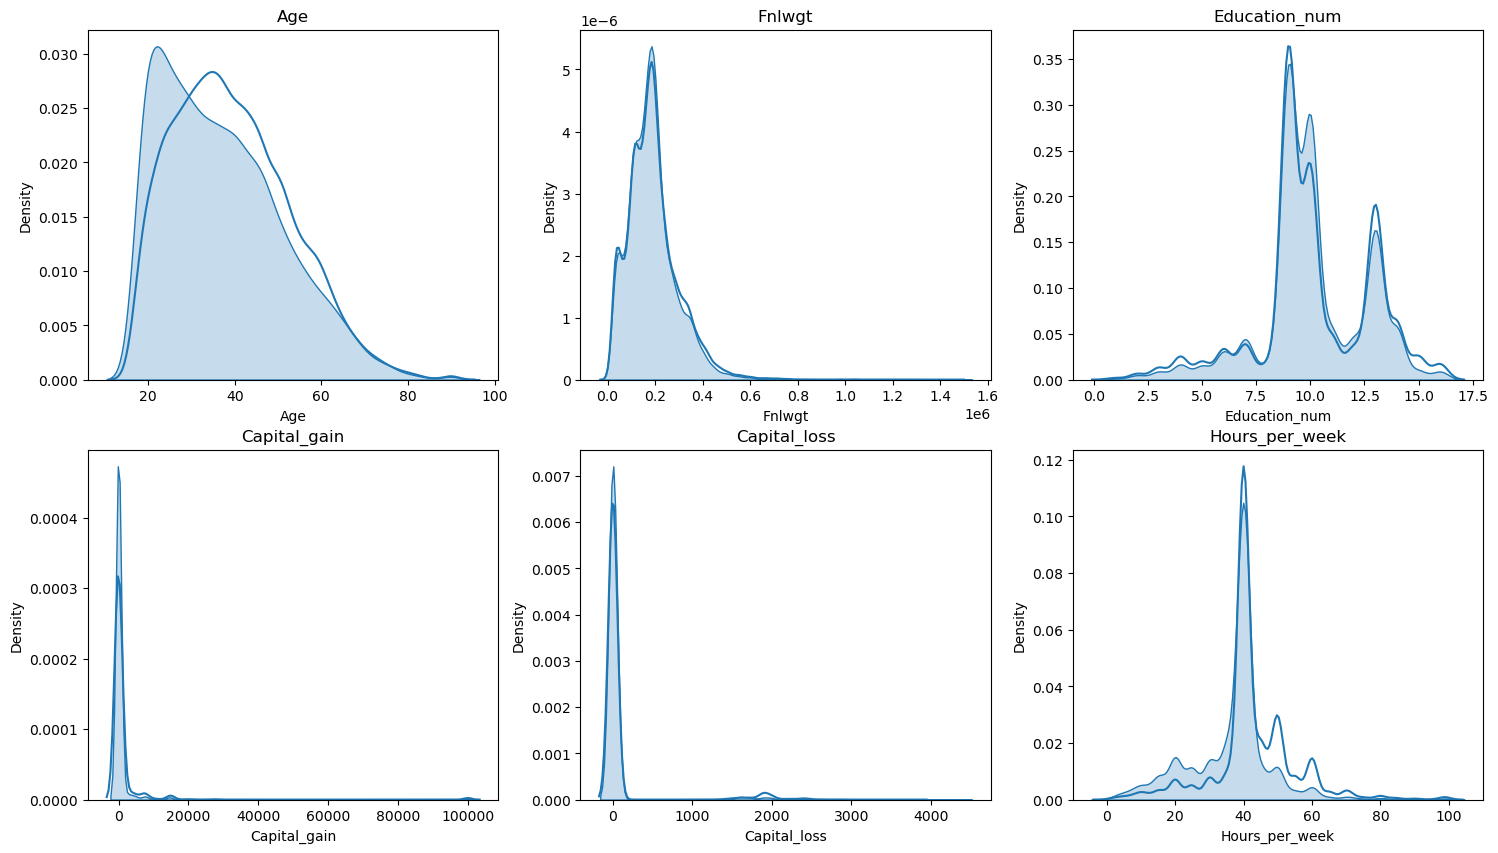

In [88]:
plt.figure(figsize=(18,10))
plt.subplot(231)

i=0
for c in num_feat:
    plt.subplot(2, 3, i+1)
    i += 1
    sns.kdeplot(df[df['Sex'] == ' Female'][c], shade=True,)
    sns.kdeplot(df[df['Sex'] == ' Male'][c], shade=False)
    plt.title(c)
plt.show()

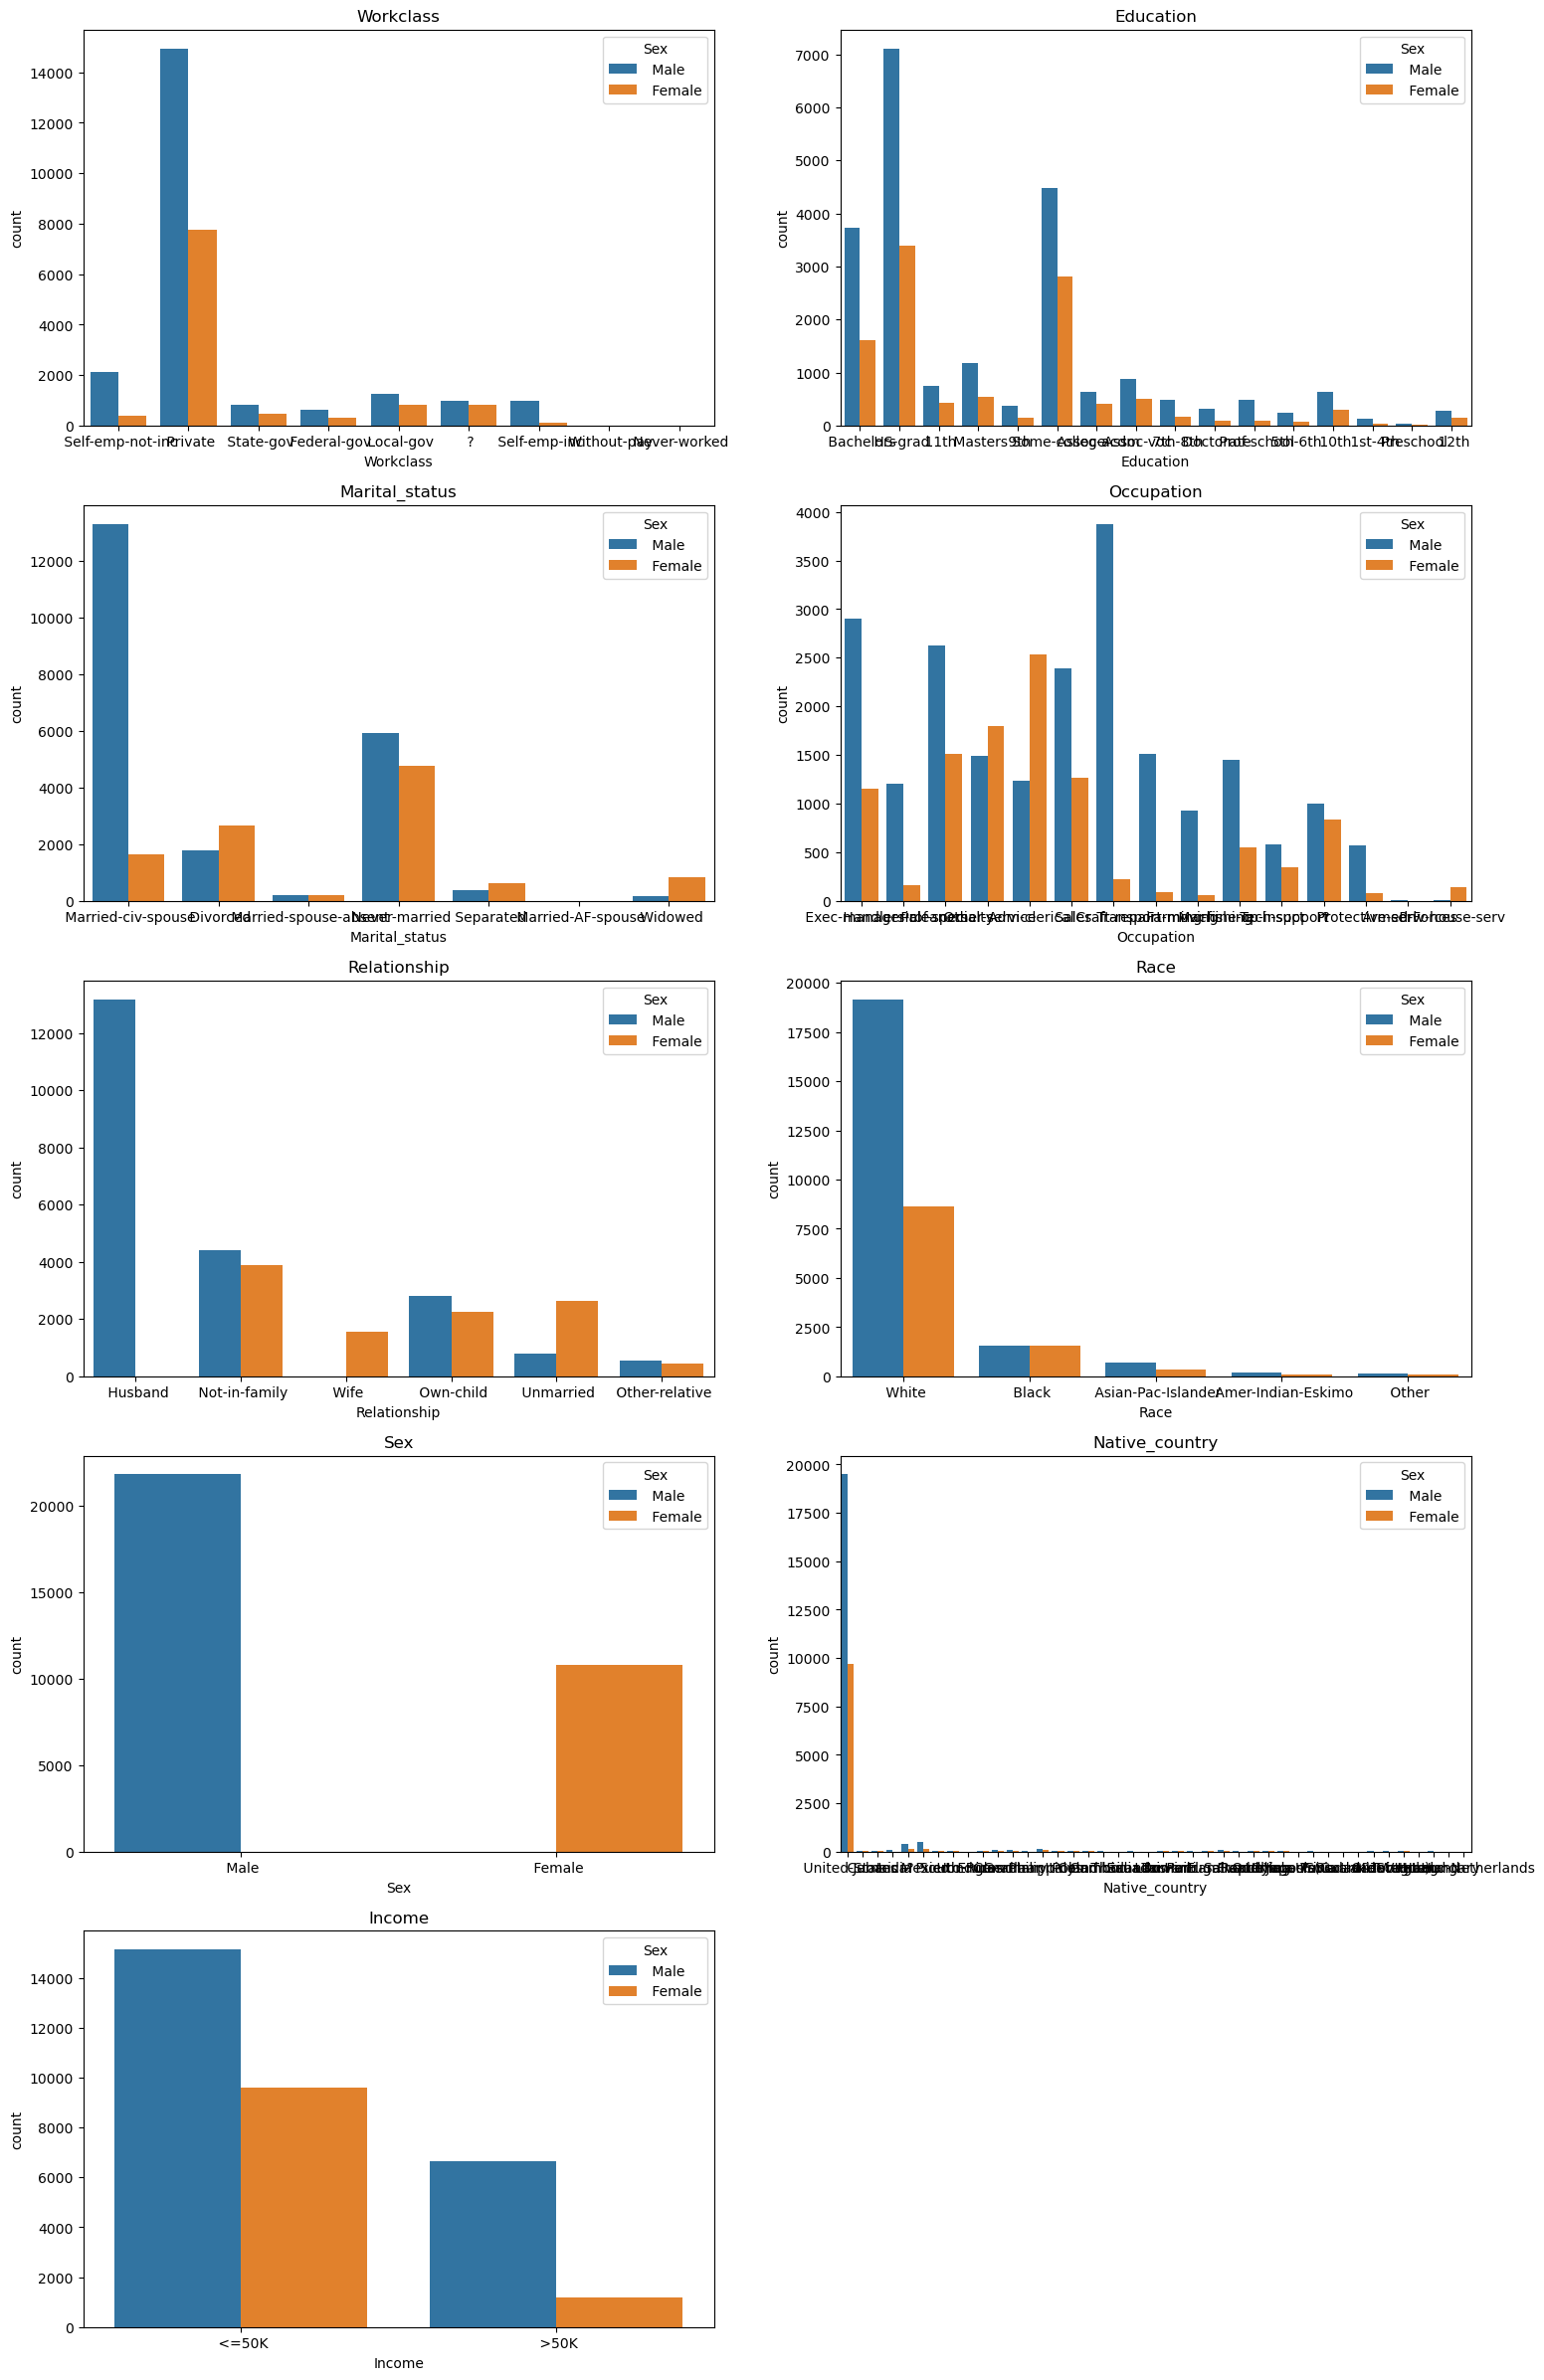

In [63]:
plt.figure(figsize=(18,30))
plt.subplot(521)

i=0
for c in cat_feat:
    plt.subplot(5, 2, i+1)
    i += 1
    sns.countplot(x=c, data=df, hue='Sex')
    plt.title(c)

plt.show()

In [98]:
nb_female = (df.Sex == ' Female').astype('int').sum()
nb_male = (df.Sex == ' Male').astype('int').sum()
nb_female, nb_male


(10771, 21789)

In [99]:
# nb of people earning more or less than 50k per gender
nb_male_above = len(df[(df.Income == ' >50K') & (df.Sex == ' Male')])
nb_male_below = len(df[(df.Income == ' <=50K') & (df.Sex == ' Male')])
nb_female_above = len(df[(df.Income == ' >50K') & (df.Sex == ' Female')])
nb_female_below = len(df[(df.Income == ' <=50K') & (df.Sex == ' Female')])
nb_male_above, nb_male_below, nb_female_above, nb_female_below
print(f'Among Males   : {nb_male_above/nb_male*100:.0f}% earn >50K // {nb_male_below/nb_male*100:.0f}% earn <=50K')
print(f'Among Females : {nb_female_above/nb_female*100:.0f}% earn >50K // {nb_female_below/nb_female*100:.0f}% earn <=50K')

Among Males   : 31% earn >50K // 69% earn <=50K
Among Females : 11% earn >50K // 89% earn <=50K


C:\Users\Admin\AppData\Local\Temp\ipykernel_9924\2240731626.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

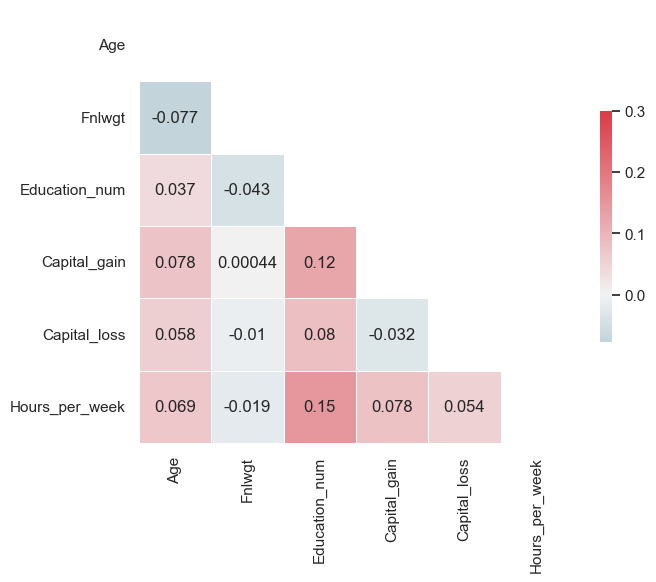

In [100]:
sns.set(style="white")

#   correlation matrix
corr = df[num_feat].corr()

# Generation of  mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# matplotlib figure
f, ax = plt.subplots(figsize=(7, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

In [103]:

#Preparing data
df['Income'] = pd.get_dummies(df['Income'], prefix='Income', drop_first=True)
y = df.Income
df = df.drop(columns=['Income'])
print(f'Ratio above 50k:  {y.sum()/len(y)*100:.2f}%')

#cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
df.head()

Ratio above 50k:  24.08%


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV


In [111]:
cat_feat = df.select_dtypes(include=['object']).columns
X = pd.get_dummies(df[cat_feat], drop_first=True)
#X = pd.concat([df[continuous_columns], df_dummies], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [112]:
#Model training and predictions
def print_score(model, name):
    model.fit(X_train, y_train)
    print('Accuracy score of the', name, f': on train = {model.score(X_train, y_train)*100:.2f}%, on test = {model.score(X_test, y_test)*100:.2f}%')


In [115]:
print_score(LogisticRegression(), 'LogisticReg')

Accuracy score of the LogisticReg : on train = 83.12%, on test = 83.57%


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
rf = RandomForestClassifier().fit(X_train, y_train)
print(f'Accuracy score of the RandomForrest: on train = {rf.score(X_train, y_train)*100:.2f}%, on test = {rf.score(X_test, y_test)*100:.2f}%')

Accuracy score of the RandomForrest: on train = 86.75%, on test = 82.88%


In [118]:
# indexes of columns which are the most important
np.argsort(rf.feature_importances_)[-16:]

# most important features
[list(X.columns)[i] for i in np.argsort(rf.feature_importances_)[-16:]][::-1]

['Marital_status_ Married-civ-spouse',
 'Marital_status_ Never-married',
 'Occupation_ Exec-managerial',
 'Sex_ Male',
 'Education_ Bachelors',
 'Occupation_ Prof-specialty',
 'Relationship_ Not-in-family',
 'Relationship_ Own-child',
 'Education_ Masters',
 'Education_ HS-grad',
 'Education_ Prof-school',
 'Workclass_ Private',
 'Relationship_ Wife',
 'Native_country_ United-States',
 'Occupation_ Other-service',
 'Education_ Some-college']

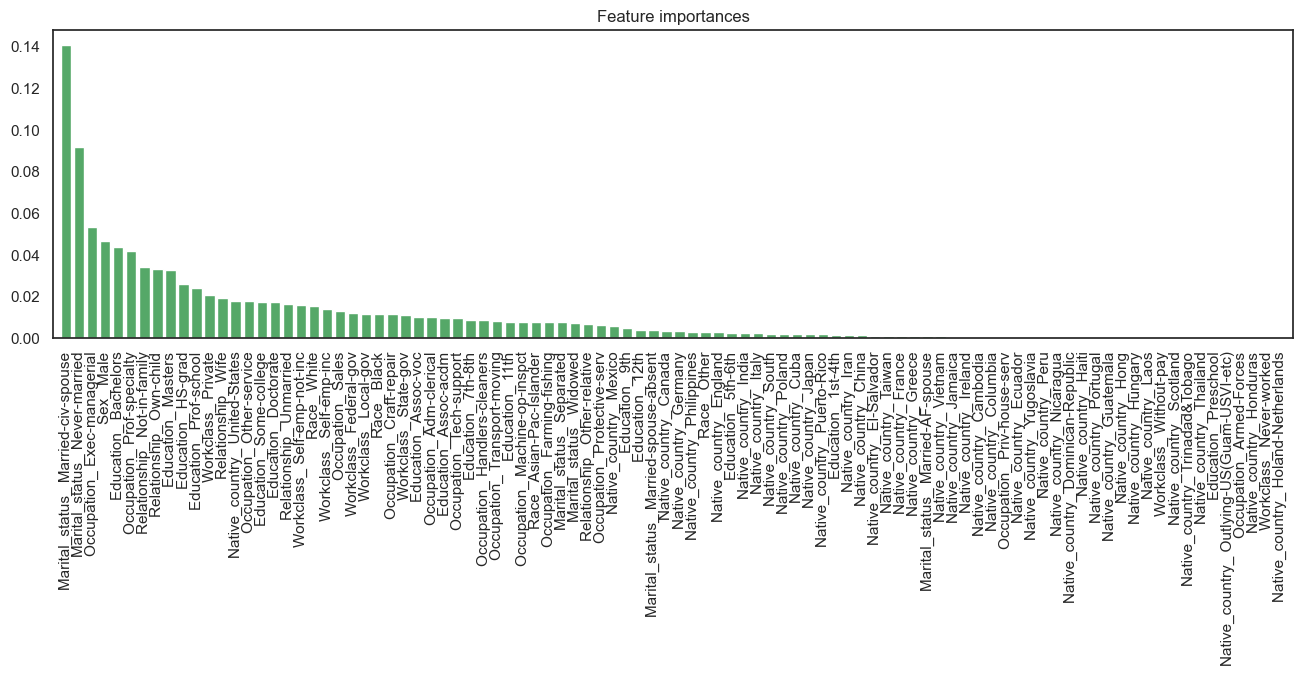

Marital_status_ Married-civ-spouse - 0.141
Marital_status_ Never-married - 0.092
Occupation_ Exec-managerial - 0.053
Sex_ Male - 0.047
Education_ Bachelors - 0.044
Occupation_ Prof-specialty - 0.042
Relationship_ Not-in-family - 0.034
Relationship_ Own-child - 0.033
Education_ Masters - 0.032
Education_ HS-grad - 0.026
Education_ Prof-school - 0.024
Workclass_ Private - 0.020
Relationship_ Wife - 0.019
Native_country_ United-States - 0.018
Occupation_ Other-service - 0.018
Education_ Some-college - 0.017
Education_ Doctorate - 0.017
Relationship_ Unmarried - 0.016
Workclass_ Self-emp-not-inc - 0.016
Race_ White - 0.015
Workclass_ Self-emp-inc - 0.014
Occupation_ Sales - 0.013
Workclass_ Federal-gov - 0.012
Workclass_ Local-gov - 0.012
Race_ Black - 0.011
Occupation_ Craft-repair - 0.011
Workclass_ State-gov - 0.011
Education_ Assoc-voc - 0.010
Occupation_ Adm-clerical - 0.010
Education_ Assoc-acdm - 0.009
Occupation_ Tech-support - 0.009
Education_ 7th-8th - 0.009
Occupation_ Handlers-

In [120]:
# Feature importances
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
num_features = len(importances)

# Plot the feature importances of the tree
plt.figure(figsize=(16, 4))
plt.title("Feature importances")
plt.bar(range(num_features), importances[indices], color="g", align="center")
plt.xticks(range(num_features), [features[i] for i in indices], rotation='vertical')
plt.xlim([-1, num_features])
plt.show()

# Print values
for i in indices:
    print ("{0} - {1:.3f}".format(features[i], importances[i]))

<Axes: >

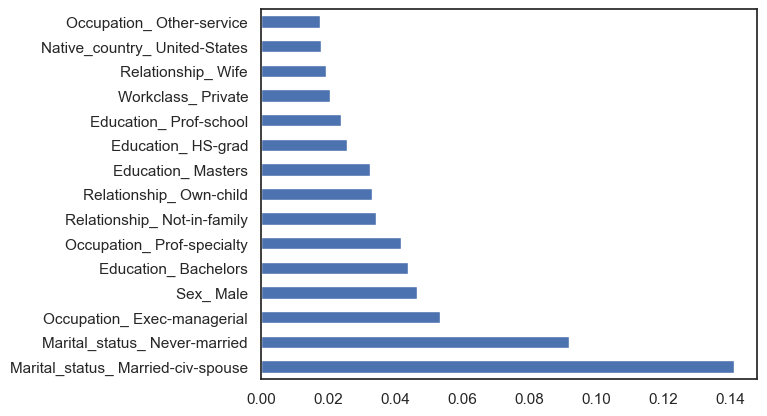

In [122]:
(pd.Series(rf.feature_importances_, index=X_train.columns)
   .nlargest(15)
   .plot(kind='barh'))
